In [1]:
from RBM import RBM
import numpy as np
from sklearn.linear_model import LogisticRegression
import torch
from torchvision import datasets, transforms
from torchvision.utils import make_grid
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 64
VISIBLE_UNITS = 784  # 28 x 28 images
HIDDEN_UNITS = 128
CD_K = 2
EPOCHS = 10

In [3]:
# Load MNIST Data
batch_size = 64
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.ToTensor()])
                  ),
    batch_size=batch_size
)

test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data',
        train=False,
        transform=transforms.Compose(
            [transforms.ToTensor()])
                  ),
    batch_size=batch_size
)

In [4]:
VIS_NUM = 28*28
HID_NUM = 128
rbm = RBM(VIS_NUM, HID_NUM, k=CD_K)

In [5]:
def show_adn_save(file_name,img):
    npimg = np.transpose(img.numpy(),(1,2,0))
    f = "./%s.png" % file_name
    plt.imshow(npimg)
    plt.imsave(f,npimg)

In [6]:
print("Training:")
print(f"EPOCHS = {EPOCHS}")

for epoch in range(EPOCHS):
    epoch_err = 0

    for batch, _ in train_loader:
        batch = batch.view(len(batch), VIS_NUM)
        epoch_err += rbm.train(batch)
            
    print(f"Epoch Num. {epoch} Err.: {epoch_err}")

Training:
EPOCHS = 10
Epoch Num. 0 Err.: 2234719.5
Epoch Num. 1 Err.: 1503170.875
Epoch Num. 2 Err.: 1354491.25
Epoch Num. 3 Err.: 1266455.875
Epoch Num. 4 Err.: 1204568.625
Epoch Num. 5 Err.: 1155723.875
Epoch Num. 6 Err.: 1116252.0
Epoch Num. 7 Err.: 1081505.25
Epoch Num. 8 Err.: 1050748.75
Epoch Num. 9 Err.: 1025037.4375


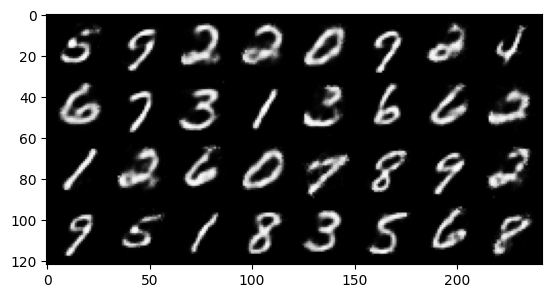

In [7]:
show_adn_save("real",make_grid(rbm.sample_visible(rbm.sample_hidden(batch)[0])[0].view(32,1,28,28).data))

In [8]:
print('Getting features:')

train_features = np.zeros((len(train_dataset), HIDDEN_UNITS))
train_labels = np.zeros(len(train_dataset))
test_features = np.zeros((len(test_dataset), HIDDEN_UNITS))
test_labels = np.zeros(len(test_dataset))

for i, (batch, labels) in enumerate(train_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)

    train_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.sample_hidden(batch)[0].cpu().numpy()
    train_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()

for i, (batch, labels) in enumerate(test_loader):
    batch = batch.view(len(batch), VISIBLE_UNITS)

    test_features[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = rbm.sample_hidden(batch)[0].cpu().numpy()
    test_labels[i*BATCH_SIZE:i*BATCH_SIZE+len(batch)] = labels.numpy()

Getting features:


In [9]:
print('Classifying:')

clf = LogisticRegression()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

print(f'Result: {sum(predictions == test_labels)}/{test_labels.shape[0]}')

Classifying:
Result: 9379/10000


C:\Users\brand\Documents\projects\venvs\phys_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
